In [5]:
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('bg_master_1.csv')
data.head()
data.columns


Index(['Unnamed: 0', 'DATE2', 'ENTRIES', 'EXITS', 'PRCP', 'SNOW', 'SNWD',
       'TMAX', 'TMIN'],
      dtype='object')

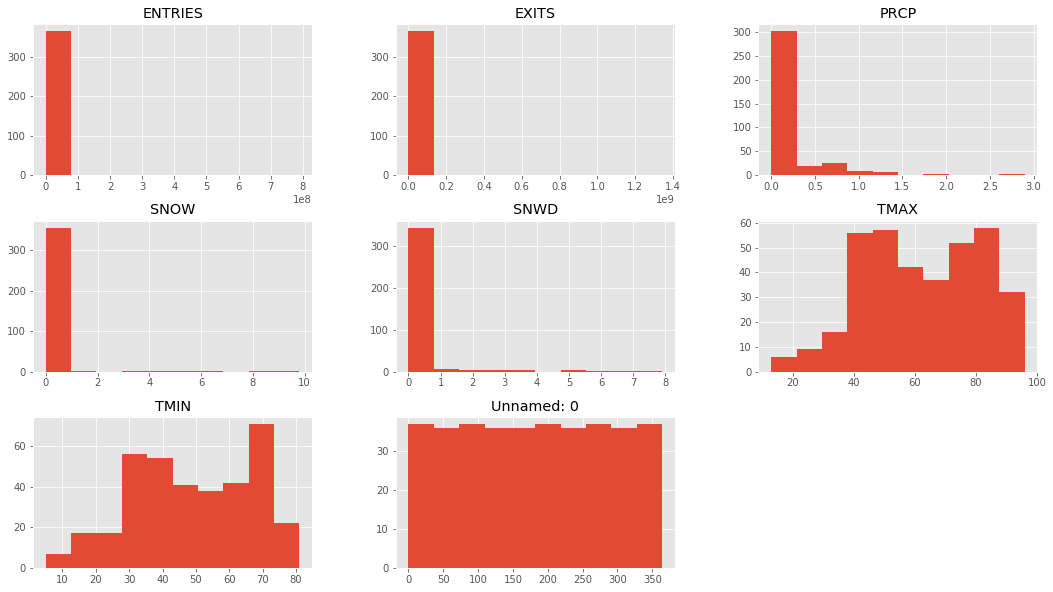

In [4]:
data.hist(figsize=(18,10) );

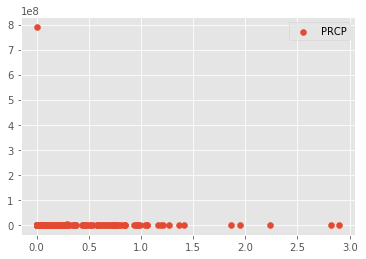

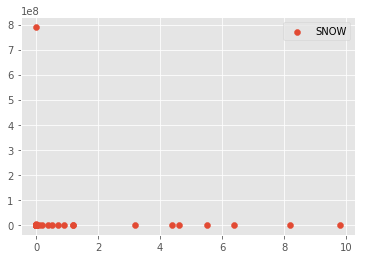

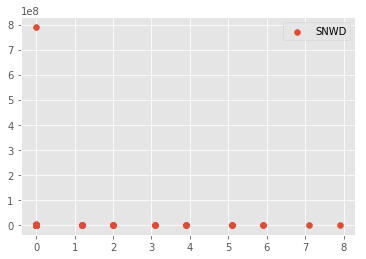

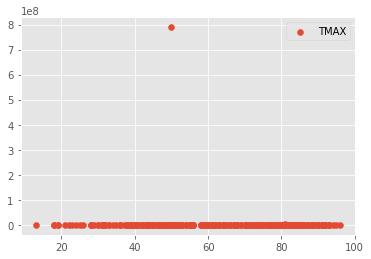

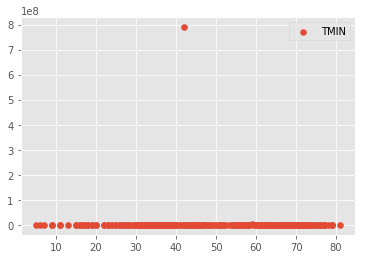

In [6]:
features = ['PRCP','SNOW','SNWD','TMAX','TMIN']
for column in features:
    plt.scatter(data[column], data.ENTRIES, label=column)
    plt.legend()
    plt.show()
